In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from pathlib import Path


In [58]:
data_dir = r"C:\Users\Aamna\Desktop\brain_tumor_dataset"

In [59]:
img_size   = (128, 128)   # small, fast, good starting point
batch_size = 16
seed       = 123


In [60]:
dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [61]:
val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [62]:
class_names = dataset.class_names
print("Classes:", class_names)

# Optional: small performance boost for input pipeline
AUTOTUNE = tf.data.AUTOTUNE
dataset     = dataset.cache().prefetch(AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(AUTOTUNE)

Classes: ['no', 'yes']


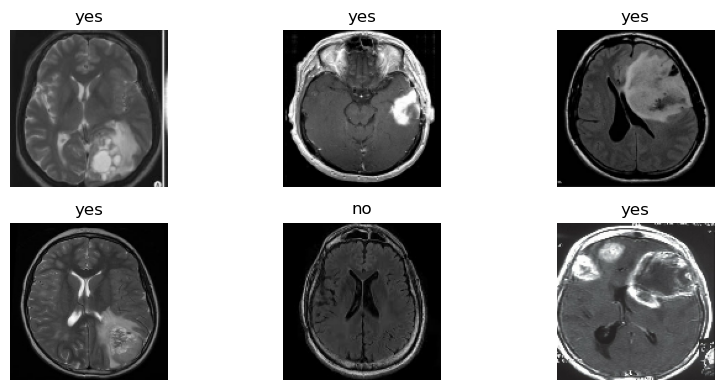

In [63]:
plt.figure(figsize=(9, 4))
for images, labels in dataset.take(1):
    for i in range(min(6, images.shape[0])):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [64]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_size[0], img_size[1], 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')  # logits -> probabilities
])


C:\Users\Aamna\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,287,938 (16.36 MB)

 Trainable params: 4,287,938 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(
    dataset,
    epochs=15,                    # bump to 20–25 later if needed
    validation_data=val_dataset
)


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 514s 39s/step - accuracy: 0.6158 - loss: 1.1194 - val_accuracy: 0.9200 - val_loss: 0.4159
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 551s 43s/step - accuracy: 0.7685 - loss: 0.5384 - val_accuracy: 0.8200 - val_loss: 0.3961
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 443s 33s/step - accuracy: 0.7833 - loss: 0.4740 - val_accuracy: 0.8400 - val_loss: 0.3763
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 432s 33s/step - accuracy: 0.7882 - loss: 0.4251 - val_accuracy: 0.8600 - val_loss: 0.3330
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 435s 33s/step - accuracy: 0.8177 - loss: 0.3647 - val_accuracy: 0.8400 - val_loss: 0.3301
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 440s 34s/step - accuracy: 0.8867 - loss: 0.2758 - val_accuracy: 0.9000 - val_loss: 0.3012
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 446s 34s/step - accuracy: 0.9113 - loss: 0.2215 - val_accuracy: 0.9200 - val_loss: 0.1955
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 444s 34s/step - accuracy: 0.9606 - loss: 0.1425 - val_accuracy: 0.

In [67]:
val_loss, val_acc = model.evaluate(val_dataset, verbose=2)
print(f"\nValidation accuracy: {val_acc:.4f}")

4/4 - 1s - 208ms/step - accuracy: 1.0000 - loss: 0.0236

Validation accuracy: 1.0000


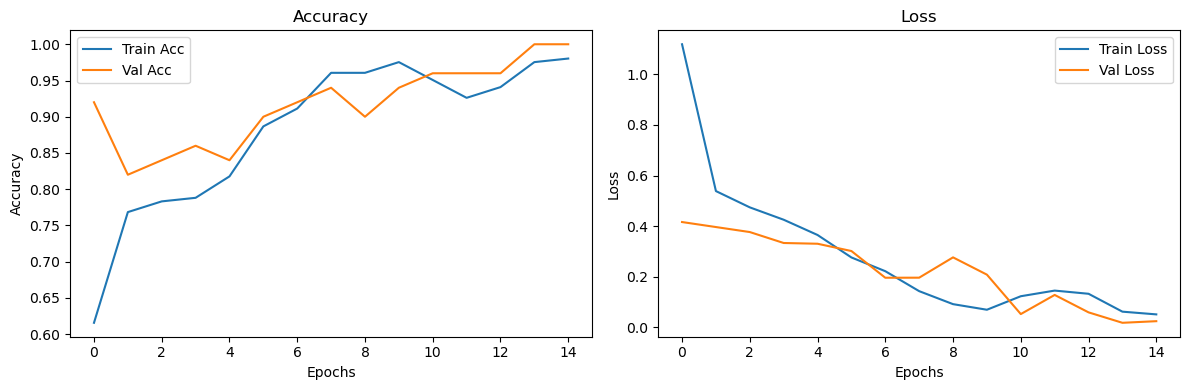

In [68]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],     label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],     label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss')

plt.tight_layout()
plt.show()

In [69]:
model.save("brain_tumor_mri_cnn.keras")
print("Saved model -> brain_tumor_mri_cnn.keras")

Saved model -> brain_tumor_mri_cnn.keras
